<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

#### Read the data

Load the csv file and print the first five observations.

In [3]:
df=pd.read_csv('bank_churn.csv')
df.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df['Closed_Acc'].value_counts()

0    7898
1    2022
Name: Closed_Acc, dtype: int64

In [5]:
df['Closed_Acc'].value_counts(normalize=True)*100

0    79.616935
1    20.383065
Name: Closed_Acc, dtype: float64

yes the target variable is imbalanced instances of class-0 are more than instances of class-1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df2=pd.get_dummies(df,drop_first=True)
y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()

coef=pd.DataFrame(model.params,columns=['coefs'])
coef['Exp_coefs']=np.exp(model.params)
coef

Optimization terminated successfully.
         Current function value: 0.442342
         Iterations 6


,coefs,Exp_coefs
const,-3.815257,0.022032
CreditScore,-0.000518,0.999482
Age,0.070491,1.073035
NumOfYrsWithBank,-0.008052,0.991980
Balance,0.000002,1.000002
NumOfProducts,-0.122242,0.884934
HasCrCard,-0.029087,0.971332
Geography_Germany,0.784232,2.190723
Geography_Spain,0.011815,1.011885
Gender_Male,-0.540329,0.582556


In [10]:
print("odds ratio for each variable is:")
coef['Exp_coefs']

odds ratio for each variable is:


const                0.022032
CreditScore          0.999482
Age                  1.073035
NumOfYrsWithBank     0.991980
Balance              1.000002
NumOfProducts        0.884934
HasCrCard            0.971332
Geography_Germany    2.190723
Geography_Spain      1.011885
Gender_Male          0.582556
Name: Exp_coefs, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score

y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.25 else 1)
cm=confusion_matrix(y,y_pred)
print("confusion matrix is : \n",cm)

Optimization terminated successfully.
         Current function value: 0.442342
         Iterations 6
confusion matrix is : 
 [[6367 1531]
 [ 849 1173]]


In [12]:
TP=1172
TN=6367
FN=849
FP=1531

sensitivity=TP/(FN+TP)
specificity=TN/(TN+FP)

print("The sensitivity of the model is : ", sensitivity)
print("The specificity of the model is : ",specificity)

The sensitivity of the model is :  0.5799109351806037
The specificity of the model is :  0.8061534565712839


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=4)
lor=LogisticRegression()
rfe=RFE(estimator=lor,n_features_to_select=6,verbose=3)
rfe.fit(x_train,y_train)

y_pred=rfe.predict(x_test)
y_prob=rfe.predict_proba(x_test)[:,1]

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


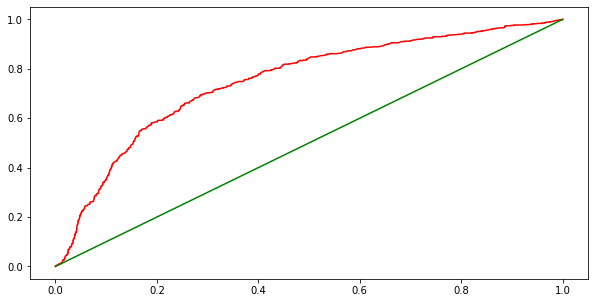

In [15]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)
lor=LogisticRegression()
lor.fit(x_train,y_train)

y_pred=lor.predict(x_test)
y_prob=lor.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob)
j_scores = tpr-fpr
j_ordered = sorted(zip(j_scores,thresholds))

print("Optimum threshold/cut-off value for sull model: ",round(j_ordered[-1][1],2))

Optimum threshold/cut-off value for sull model:  0.21


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
from sklearn.metrics import cohen_kappa_score
y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)
import statsmodels.api as sm
xc=sm.add_constant(xc)
model=sm.Logit(y,xc).fit()
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.21 else 1)

print(classification_report(y,y_pred))
print("Accuracy: ",accuracy_score(y,y_pred))
print("kappa score: ",cohen_kappa_score(y,y_pred))

Optimization terminated successfully.
         Current function value: 0.442342
         Iterations 6
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      7898
           1       0.39      0.66      0.49      2022

    accuracy                           0.72      9920
   macro avg       0.64      0.70      0.65      9920
weighted avg       0.79      0.72      0.74      9920

Accuracy:  0.7173387096774193
kappa score:  0.31130896378239736


In [19]:
print("F1_score is: ",0.49)

F1_score is:  0.49


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

y=df2['Closed_Acc']
x=df2.drop('Closed_Acc',axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.442342
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Closed_Acc   No. Observations:                 9920
Model:                          Logit   Df Residuals:                     9910
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:                  0.1252
Time:                        11:20:49   Log-Likelihood:                -4388.0
converged:                       True   LL-Null:                       -5016.2
Covariance Type:            nonrobust   LLR p-value:                8.166e-265
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.8153      0.240    -15.873      0.000      -4.286      -3.344
CreditScore          -0.0005      0.000     -1.857      0.063      -0.001    2.88e-05
Age                   0.0705      0.003     27.551      0.000       0.065       0.076
NumOfYrsWithBank     -0.0081      0.009     -0.872      0.383      -0.026       0.010
Balance            2.418e-06   5.12e-07      4.724      0.000    1.41e-06    3.42e-06
NumOfProducts        -0.1222      0.047     -2.614      0.009      -0.214      -0.031
HasCrCard            -0.0291      0.059     -0.496      0.620      -0.144       0.086
Geography_Germany     0.7842      0.067     11.751      0.000       0.653       0.915
Geography_Spain       0.0118      0.070      0.168      0.867      -0.126       0.150
Gender_Male          -0.5403      0.054    -10.035      0.000      -0.646      -0.435
=====================================================================================
"""

In [21]:
# now we will check for multicollinearity using VIF
vif=[VIF(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vif,index=xc.columns,columns=['vif'])

,vif
const,80.630073
CreditScore,1.000439
Age,1.004781
NumOfYrsWithBank,1.001064
Balance,1.336522
NumOfProducts,1.121580
HasCrCard,1.001403
Geography_Germany,1.339241
Geography_Spain,1.124809
Gender_Male,1.002595


Vif values of all varibales are less than 10(cut-off score). Hence no variables are involved in multi-collinearity.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Optimization terminated successfully.
         Current function value: 0.442342
         Iterations 6
Accuracy :  0.7923387096774194


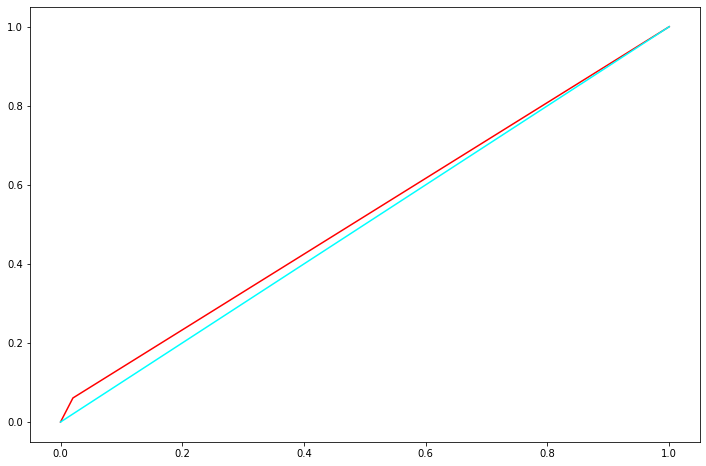

In [24]:
y=df2['Closed_Acc']
x=df2.drop("Closed_Acc",axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()

y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.6 else 1)

print("Accuracy : ",accuracy_score(y,y_pred))
fpr,tpr,thresholds=roc_curve(y,y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'cyan')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here